<a href="https://colab.research.google.com/github/gyuwhi-park/Study/blob/Machine-learning/KoNLP_okt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KoNLP
    - KoNLPy는 한국어 정보처리를 위한 파이썬 패키지이다.
        참고 : https://konlpy-ko.readthedocs.io/ko/v0.4.3/
    - NLP(자연어 처리)는 텍스트에서 의미있는 정보를 분석, 추출하고 이해하는 기술을 말한다.
    - 한국어는 영어와 다르게 조사 등이 띄어쓰기 없이 붙어있기 때문에 이를 처리하는 과정이 필요하다.
    - KoNLP를 위한 패키지에는 Hannanum, Kkma, Komoran, Mecab, okt(twitter)가 있는데, 여기에서는 okt를 활용한다.

In [ ]:
#참고 리스트

#https://konlpy.org/ko/latest/index.html

#okt(tweeter) - https://konlpy.org/ko/latest/api/konlpy.tag/#konlpy.tag._okt.Okt

In [1]:
! pip install konlpy
! pip install tweepy==3.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 48.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import konlpy
from konlpy.tag import Okt
twitter=Okt()

In [33]:
txt1 = '아버지가방에들어가신다'
txt2 = '지오디의사랑해그리고기억해'
txt3 = '서울시장애인복지관'

#1,2는 띄어쓰기에 따라 다른 문장으로 나오기도 하고,
#3은 원래의 문장을 찾을수가 없다.

In [34]:
twitter.pos(txt1)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]

In [35]:
twitter.pos("아버지가방에 들어가신다")

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]

In [36]:
twitter.pos(txt2)

[('지오디', 'Noun'),
 ('의', 'Josa'),
 ('사랑', 'Noun'),
 ('해', 'Noun'),
 ('그리고', 'Conjunction'),
 ('기억', 'Noun'),
 ('해', 'Noun')]

In [37]:
twitter.pos("지오디 의사랑해 그리고 기억해")

[('지오디', 'Noun'),
 ('의사', 'Noun'),
 ('랑', 'Josa'),
 ('해', 'Noun'),
 ('그리고', 'Conjunction'),
 ('기억', 'Noun'),
 ('해', 'Verb')]

In [38]:
twitter.pos(txt3)

[('서울시장', 'Noun'), ('애인', 'Noun'), ('복지관', 'Noun')]

##형태소 분석
     - 어간추출(stemming) : morphs(객체명, stem = true)
     -> 각 단어의 원형을 추출해서 출력
        ex) 들어가신다 -> 들어가다(원형)

In [39]:
twitter.morphs(txt1, norm = True, stem=True)

['아버지', '가방', '에', '들어가다']

In [40]:
twitter.morphs(txt1, stem=False)

['아버지', '가방', '에', '들어가신다']

In [41]:
twitter.morphs(txt2, stem=True)

['지오디', '의', '사랑', '해', '그리고', '기억', '해']

In [42]:
twitter.morphs(txt3, stem=True)

['서울시장', '애인', '복지관']

##명사 추출
    -nouns(객체명)

In [43]:
twitter.nouns(txt1)

['아버지', '가방']

In [44]:
twitter.nouns(txt2)

['지오디', '사랑', '해', '기억', '해']

In [45]:
twitter.nouns(txt3)

['서울시장', '애인', '복지관']

##대한민국 헌법 말뭉치 : kolaw
    -국회 법안 말뭉치 : kobill

In [26]:
from konlpy.corpus import kolaw
from konlpy.corpus import kobill

In [27]:
kolaw.fileids()   # 말뭉치 파일명 출력
kobill.fileids()

['1809894.txt',
 '1809891.txt',
 '1809899.txt',
 '1809898.txt',
 '1809893.txt',
 '1809896.txt',
 '1809892.txt',
 '1809895.txt',
 '1809890.txt',
 '1809897.txt']

In [46]:
docs = kolaw.open('constitution.txt').read()

In [50]:
docs[:100]

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의'

### 대한민국 헌법 말뭉치에서 자주 언급되는 단어 분석

In [52]:
from collections import Counter
#collections - https://docs.python.org/ko/3/library/collections.html

In [53]:
words = twitter.nouns(docs)   # 품사 중 명사만 추출

In [55]:
words[:10]

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국']

In [56]:
wc= Counter(words)# 단어별 빈도 분석

In [57]:
#가장 빈도가 많은 단어 25개
wc.most_common(25)

[('제', 175),
 ('법률', 127),
 ('정', 89),
 ('수', 88),
 ('대통령', 83),
 ('국가', 73),
 ('국회', 68),
 ('국민', 61),
 ('관', 58),
 ('때', 55),
 ('헌법', 53),
 ('그', 47),
 ('이', 38),
 ('모든', 37),
 ('바', 37),
 ('위', 36),
 ('기타', 26),
 ('및', 25),
 ('사항', 23),
 ('권리', 21),
 ('안', 21),
 ('의원', 21),
 ('자유', 20),
 ('정부', 20),
 ('선거', 20)]

### 추출된 명사에서 단어문자를 제외 한 단어 빈도 분석
    -단어 문자 : 한 문자가 하나의 단어가 되는 문자


In [58]:
tokens = twitter.nouns(docs)

In [59]:
words = [t for t in tokens if len(t) >= 2]

In [60]:
words

['대한민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '운동',
 '건립',
 '대한민국',
 '임시정부',
 '통과',
 '불의',
 '항거',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주',
 '개혁',
 '평화',
 '통일',
 '사명',
 '각하',
 '정의',
 '인도',
 '동포',
 '로써',
 '민족',
 '단결',
 '공고',
 '모든',
 '사회',
 '폐습',
 '불의',
 '타파',
 '자율',
 '조화',
 '바탕',
 '자유민주',
 '질서',
 '더욱',
 '정치',
 '경제',
 '사회',
 '문화',
 '모든',
 '영역',
 '각인',
 '기회',
 '능력',
 '최고',
 '도로',
 '발휘',
 '자유',
 '권리',
 '책임',
 '의무',
 '완수',
 '국민',
 '생활',
 '향상',
 '기하',
 '항구',
 '세계',
 '평화',
 '인류',
 '공영',
 '이바지',
 '우리',
 '우리',
 '자손',
 '안전',
 '자유',
 '행복',
 '확보',
 '다짐',
 '제정',
 '개정',
 '헌법',
 '이제',
 '국회',
 '의결',
 '국민투표',
 '개정',
 '대한민국',
 '민주공화국',
 '대한민국',
 '주권',
 '국민',
 '모든',
 '권력',
 '국민',
 '대한민국',
 '국민',
 '요건',
 '법률',
 '국가',
 '법률',
 '재외국민',
 '보호',
 '의무',
 '대한민국',
 '영토',
 '한반도',
 '부속',
 '도서',
 '대한민국',
 '통일',
 '지향',
 '자유민주',
 '질서',
 '입각',
 '평화',
 '통일',
 '정책',
 '수립',
 '추진',
 '대한민국',
 '국제',
 '평화',
 '유지',
 '노력',
 '침략',
 '전쟁',
 '부인',
 '국군',
 '국가',
 '안전보장',
 '국토',
 '방위',
 '의무',
 '수행',
 '사명',
 '정치',
 '중립성',
 '준수',
 '헌법',


In [61]:
wc= Counter(words)

### 대한민국 헌법 말뭉치를 이용해서 워드클라우드로 시각화

In [62]:
from wordcloud import WordCloud

In [63]:
import matplotlib.pyplot as plt

In [64]:
wc = dict(wc.most_common(25))

In [65]:
wc

{'법률': 127,
 '대통령': 83,
 '국가': 73,
 '국회': 68,
 '국민': 61,
 '헌법': 53,
 '모든': 37,
 '기타': 26,
 '사항': 23,
 '권리': 21,
 '의원': 21,
 '자유': 20,
 '정부': 20,
 '선거': 20,
 '임명': 20,
 '직무': 19,
 '국무총리': 19,
 '경제': 18,
 '의무': 18,
 '조직': 18,
 '국회의원': 18,
 '임기': 18,
 '의결': 17,
 '공무원': 17,
 '경우': 17}

In [77]:
import numpy as np
from PIL import Image

In [85]:
korfont = '나눔손글씨 손편지체.ttf'

In [81]:
#돌고래 모양의 마스크를 사용
mask_path = '다운로드.png'
mask = np.array(Image.open(mask_path))

(-0.5, 499.5, 499.5, -0.5)

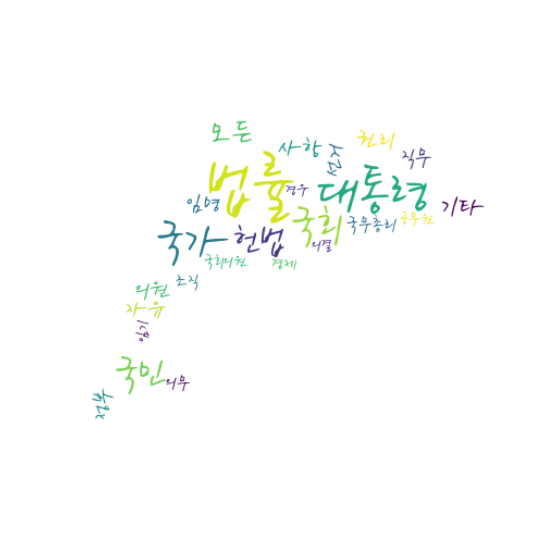

In [87]:
wcimg = WordCloud(background_color = 'white', mask = mask, font_path = korfont).generate_from_frequencies(wc)
plt.figure(figsize=(10,10))
plt.imshow(wcimg, interpolation = 'bilinear')
plt.axis('off')

### 영화 스크립트(타짜)에서 2자 이상 단어 추출하기

In [103]:
with open('타짜.txt') as f:
    docs1 = f.read()

In [104]:
tokens1 = twitter.nouns(docs1)

In [105]:
#단문자 단어 제거
words1 = [t for t in tokens1 if len(t) > 1]

In [106]:
wc1 = Counter(words1)

In [107]:
wc1 = dict(wc1.most_common(125))

In [108]:
mask_path = 'dolphin.jpg'
mask = np.array(Image.open(mask_path))

(-0.5, 481.5, 625.5, -0.5)

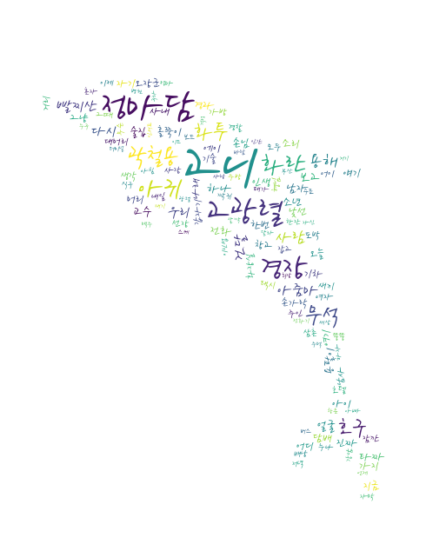

In [109]:
wcimg1 = WordCloud(background_color = 'white', mask = mask, font_path = korfont).generate_from_frequencies(wc1)
plt.figure(figsize=(10,10))
plt.imshow(wcimg1, interpolation = 'bilinear')
plt.axis('off')